In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib. pyplot as plt
import random as rnd
import numpy as np
from keras.layers import Conv2D, Dense, MaxPooling2D, UpSampling2D, Input
import pandas as pd
from sewar.full_ref import uqi
from keras.models import load_model
from sklearn.model_selection import train_test_split

Load and reshape datasets

In [2]:
alphabites=pd.read_csv("A_Z Handwritten Data.csv")

In [3]:
alphabites = alphabites.drop(alphabites.columns[0],axis=1)
print("data shape : "+str(alphabites.shape))

data shape : (372450, 784)


In [4]:
alphabites=np.array(alphabites)
alphabites=alphabites.reshape(len(alphabites),28,28,1)
print("new data shape : "+str(alphabites.shape))

new data shape : (372450, 28, 28, 1)


In [5]:
X_train=alphabites[:60000]
X_test=alphabites[60000:70000]
print("train shape: "+str(X_train.shape))
print("test shape: "+str(X_test.shape))

train shape: (60000, 28, 28, 1)
test shape: (10000, 28, 28, 1)


Normalize Data

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
np.random.shuffle(X_train)
np.random.shuffle(X_test)

Create Model

In [8]:
model = keras.Sequential([
    # encoder
    Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(28, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    # encode output
    Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="CODE"),

    # decoder
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(28, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    UpSampling2D((2, 2)),

    # decode output
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        16156     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4048      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

Fit the model and save it

In [11]:
model.fit(X_train, X_train, epochs=20, validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 200s 106ms/step - loss: 0.1754 - accuracy: 0.8127 - val_loss: 0.1764 - val_accuracy: 0.8026
Epoch 2/20
1875/1875 [==============================] - 201s 107ms/step - loss: 0.1411 - accuracy: 0.8234 - val_loss: 0.1660 - val_accuracy: 0.8061
Epoch 3/20
1875/1875 [==============================] - 199s 106ms/step - loss: 0.1339 - accuracy: 0.8253 - val_loss: 0.1635 - val_accuracy: 0.8080
Epoch 4/20
1875/1875 [==============================] - 200s 107ms/step - loss: 0.1299 - accuracy: 0.8262 - val_loss: 0.1580 - val_accuracy: 0.8091
Epoch 5/20
1875/1875 [==============================] - 202s 108ms/step - loss: 0.1273 - accuracy: 0.8268 - val_loss: 0.1547 - val_accuracy: 0.8100
Epoch 6/20
1875/1875 [==============================] - 205s 109ms/step - loss: 0.1252 - accuracy: 0.8272 - val_loss: 0.1540 - val_accuracy: 0.8102
Epoch 7/20
1875/1875 [==============================] - 204s 109ms/step - loss: 0.1237 - accuracy: 0.8275 - val_

In [12]:
model.save('auto_encoder.h5')

Load model

In [13]:
model = load_model('auto_encoder.h5')

Prediction

In [14]:
encoder = keras.Model(inputs=model.input, outputs=model.get_layer("CODE").output)
encoded_test_image = encoder.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [15]:
print("encoded image shape: "+str(encoded_test_image.shape))

encoded image shape: (10000, 4, 4, 1)


In [16]:
decoded_test_image = model.predict(X_test)

313/313 [==============================] - 6s 19ms/step


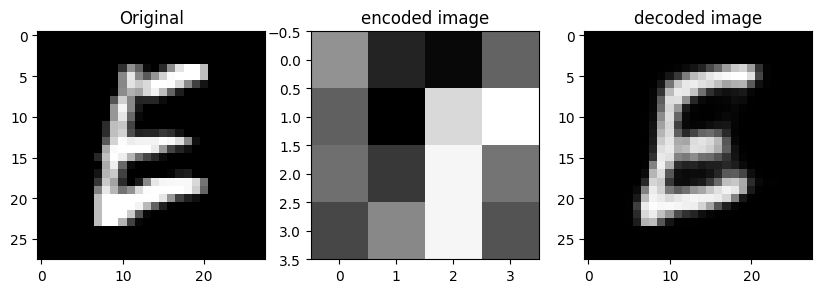

0.8398426489753141


In [24]:
index = rnd.randint(0, len(X_test))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

ax1.imshow(X_test[index], cmap='gray')
ax1.set_title('Original')

ax2.imshow(encoded_test_image[index], cmap='gray')
ax2.set_title('encoded image')

ax3.imshow(decoded_test_image[index], cmap='gray')
ax3.set_title('decoded image')

plt.show()
print(uqi(X_test[index], decoded_test_image[index]))

Evalute the model

In [18]:
print("Compression ratio: "+str(X_test.nbytes/encoded_test_image.nbytes))

Compression ratio: 98.0


In [19]:
different = 0
for i in range(len(X_test)):
    different = different + uqi(X_test[i], decoded_test_image[i])

score = different/len(X_test)

print("UQI image quality after decompression: "+str(score*100))

UQI image quality after decompression: 80.57555744074826
